In [ ]:
import pandas as pd
import numpy as np


In [ ]:
pip install opendatasets

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/mulukentesfaye/fgnet/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nohaatef
Your Kaggle Key: ··········


100%|██████████| 44.1M/44.1M [00:00<00:00, 90.3MB/s]


In [ ]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [ ]:
fgnetdata=pd.read_csv('/content/withfolderpath.csv')

In [ ]:
less = [7,50,55,56,59,64]
fgnet = fgnetdata[fgnetdata.ID.isin(less)==False]

In [ ]:
fp=fgnet['folder_path']

In [ ]:
## this line will not be executed cause the id is right and not increased
# fgnet.ID=fgnet.ID-78/

In [ ]:
ind = []
for i in range(82):
  ind.append(int(i+1))

In [ ]:
for i in less:
  if i in ind:
    ind.remove(i)


In [ ]:
fgnet=pd.DataFrame(fgnet)

In [ ]:
import time

In [ ]:
splitter = pd.DataFrame()

In [ ]:
train=pd.DataFrame()
test=pd.DataFrame()

In [ ]:
for i in fgnet['ID'].unique():
  j=[int(i)]
  splitter = fgnet[fgnet.ID.isin(j)==True]
  train = train.append(splitter[0:7])
  test = test.append(splitter[7:10])

<ipython-input-17-525fdd73daae>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(splitter[0:7])
<ipython-input-17-525fdd73daae>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(splitter[7:10])
<ipython-input-17-525fdd73daae>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(splitter[0:7])
<ipython-input-17-525fdd73daae>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(splitter[7:10])
<ipython-input-17-525fdd73daae>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = 

In [ ]:
train

,ID,db_name,full_path,age,folder_path
0,1,FGNET,001A02.JPG,2,/content/fgnet/FGNET/images/001A02.JPG
1,1,FGNET,001A05.JPG,5,/content/fgnet/FGNET/images/001A05.JPG
2,1,FGNET,001A08.JPG,8,/content/fgnet/FGNET/images/001A08.JPG
3,1,FGNET,001A10.JPG,10,/content/fgnet/FGNET/images/001A10.JPG
4,1,FGNET,001A14.JPG,14,/content/fgnet/FGNET/images/001A14.JPG
...,...,...,...,...,...
993,82,FGNET,082A16.JPG,16,/content/fgnet/FGNET/images/082A16.JPG
994,82,FGNET,082A18.JPG,18,/content/fgnet/FGNET/images/082A18.JPG
995,82,FGNET,082A20.JPG,20,/content/fgnet/FGNET/images/082A20.JPG
996,82,FGNET,082A21.JPG,21,/content/fgnet/FGNET/images/082A21.JPG


In [ ]:
test

,ID,db_name,full_path,age,folder_path
7,1,FGNET,001A19.JPG,19,/content/fgnet/FGNET/images/001A19.JPG
8,1,FGNET,001A22.JPG,22,/content/fgnet/FGNET/images/001A22.JPG
9,1,FGNET,001A28.JPG,28,/content/fgnet/FGNET/images/001A28.JPG
22,2,FGNET,002A18.JPG,18,/content/fgnet/FGNET/images/002A18.JPG
23,2,FGNET,002A20.JPG,20,/content/fgnet/FGNET/images/002A20.JPG
...,...,...,...,...,...
987,81,FGNET,081A08.JPG,8,/content/fgnet/FGNET/images/081A08.JPG
988,81,FGNET,081A10.JPG,10,/content/fgnet/FGNET/images/081A10.JPG
998,82,FGNET,082A23.JPG,23,/content/fgnet/FGNET/images/082A23.JPG
999,82,FGNET,082A25.JPG,25,/content/fgnet/FGNET/images/082A25.JPG


In [ ]:
# del train,splitter,test

In [ ]:
train_fp=train['folder_path']

In [ ]:
test_fp=test['folder_path']

In [ ]:
imgtest = []
for i in test_fp:
  imgtest.append(cv2.imread(i))

In [ ]:
for i in range(len(imgtest)):
  imgtest[i] = cv2.resize(imgtest[i],(512,512))


In [ ]:
img = []
for i in train_fp:
  img.append(cv2.imread(i))

In [ ]:
x_test=imgtest

In [ ]:
for i in range(len(img)):
  img[i] = cv2.resize(img[i],(512,512))


In [ ]:
x_train=img

In [ ]:
for i in range(len(x_train)):
  x_train[i] = x_train[i].flatten().tolist()

In [ ]:
for i in range(len(x_test)):
  x_test[i] = x_test[i].flatten().tolist()

In [ ]:
y_train=train['ID']

In [ ]:
y_test=test['ID']

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(imgList,y,test_size=20,random_state=42)

In [ ]:
model = SVC(kernel='poly')

In [ ]:
model.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
rfmodel = RandomForestClassifier()

In [ ]:
rfmodel.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
dtmodel = DecisionTreeClassifier()

In [ ]:
dtmodel.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.09      0.33      0.14         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.17      0.33      0.22         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00    

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sns

<Axes: >

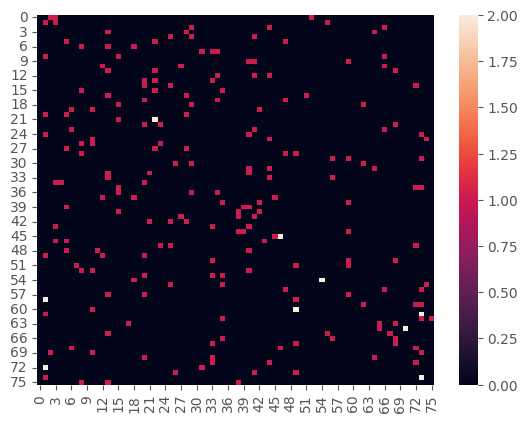

In [ ]:
sns.heatmap(cm)